<a href="https://colab.research.google.com/github/aasb2/Classificador-de-Bayes-Ingenuo/blob/main/PROJETO/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificador Ingênuo de Bayes

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,ConfusionMatrixDisplay,recall_score, precision_score, accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from numpy import mean
from numpy import std
sns.set()
import warnings
warnings.filterwarnings('ignore')

##Dataframe do UCI Machine Learning Repository que Foi Salvo No Github

In [ ]:
url = 'https://raw.githubusercontent.com/aasb2/Classificador-de-Bayes-Ingenuo/main/DATASET/bank/bank-full.csv'
df = pd.read_csv(url,delimiter = ';')
print(df.shape)

(45211, 17)


In [ ]:
df.head()

age           job  marital  education  ... pdays  previous poutcome   y
0   58    management  married   tertiary  ...    -1         0  unknown  no
1   44    technician   single  secondary  ...    -1         0  unknown  no
2   33  entrepreneur  married  secondary  ...    -1         0  unknown  no
3   47   blue-collar  married    unknown  ...    -1         0  unknown  no
4   33       unknown   single    unknown  ...    -1         0  unknown  no

[5 rows x 17 columns]

## Descrição Estatística dos Dados

In [ ]:
df.describe(include = 'all')

age        balance  ...         pdays      previous
count  45211.000000   45211.000000  ...  45211.000000  45211.000000
mean      40.936210    1362.272058  ...     40.197828      0.580323
std       10.618762    3044.765829  ...    100.128746      2.303441
min       18.000000   -8019.000000  ...     -1.000000      0.000000
25%       33.000000      72.000000  ...     -1.000000      0.000000
50%       39.000000     448.000000  ...     -1.000000      0.000000
75%       48.000000    1428.000000  ...     -1.000000      0.000000
max       95.000000  102127.000000  ...    871.000000    275.000000

[8 rows x 7 columns]

## Tipos de Dados Disponíveis no Data Frame

In [ ]:
df.info()
df['age'].dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


dtype('int64')

## Verificação de Valores Faltando no Data Frame

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

##Categorias dos dados

In [ ]:
for i in df.columns:
  if df[i].dtype != "int64":                       # .columns = Retorna um vetor com o nome de todas as colunas
    print(i, ':', df[i].unique())
  else:
    print(i, ':', 'tipo numerico')

age : tipo numerico
job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital : ['married' 'single' 'divorced']
education : ['tertiary' 'secondary' 'unknown' 'primary']
default : ['no' 'yes']
balance : tipo numerico
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
day : tipo numerico
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration : tipo numerico
campaign : tipo numerico
pdays : tipo numerico
previous : tipo numerico
poutcome : ['unknown' 'failure' 'other' 'success']
y : ['no' 'yes']


##Análise Exploratória

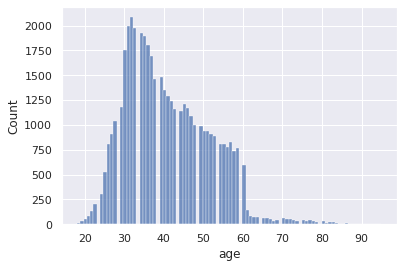

In [ ]:
sns.histplot(data=df, x='age');  

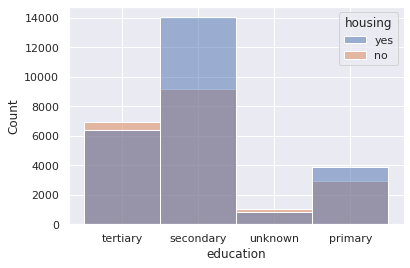

In [ ]:
sns.histplot(data=df, x='education', hue='housing');      

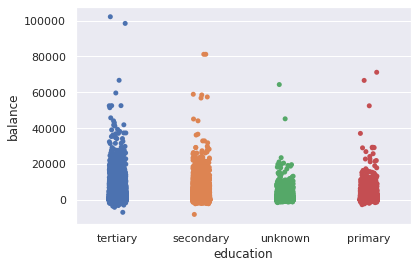

In [ ]:
sns.stripplot(data=df, x='education', y='balance');

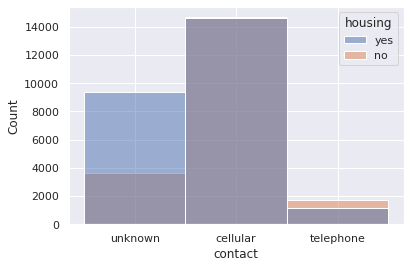

In [ ]:
sns.histplot(data=df, x='contact', hue='housing');   

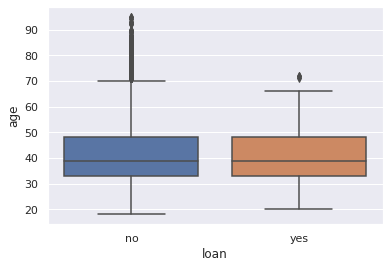

In [ ]:
sns.boxplot(data=df, x='loan', y='age');   

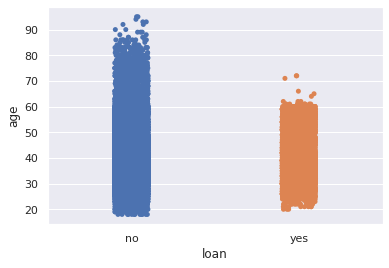

In [ ]:
sns.stripplot(data=df, x='loan', y='age');

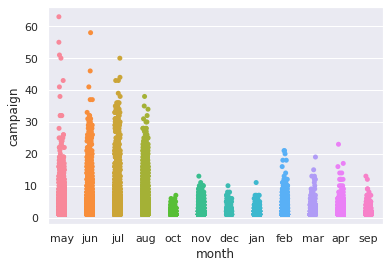

In [ ]:
sns.stripplot(data=df, x='month', y='campaign');

### Outliers

In [ ]:
def count_plot(df, columns, config, tam):
    x,y = tam
    linha, coluna = config
    plt.figure(figsize=(x, y))
    for indx, var  in enumerate(columns):
        plt.subplot(linha, coluna, indx+1)
        g = sns.countplot(df[var], hue= df['y'])
    plt.tight_layout()

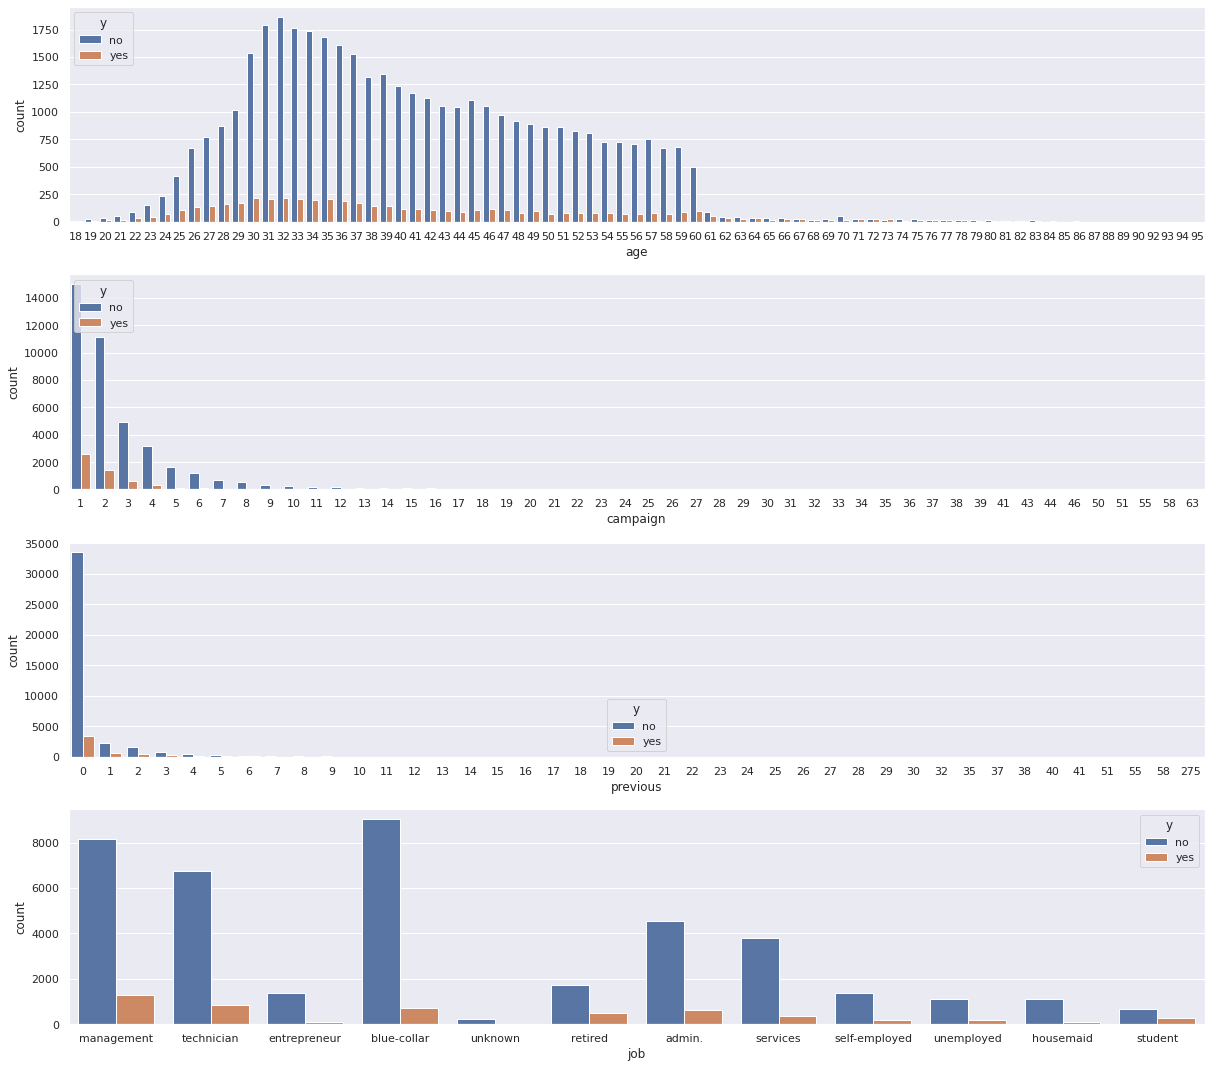

In [ ]:
count_plot(df, ['age', 'campaign', 'previous', 'job'], (4,1), (17,15))

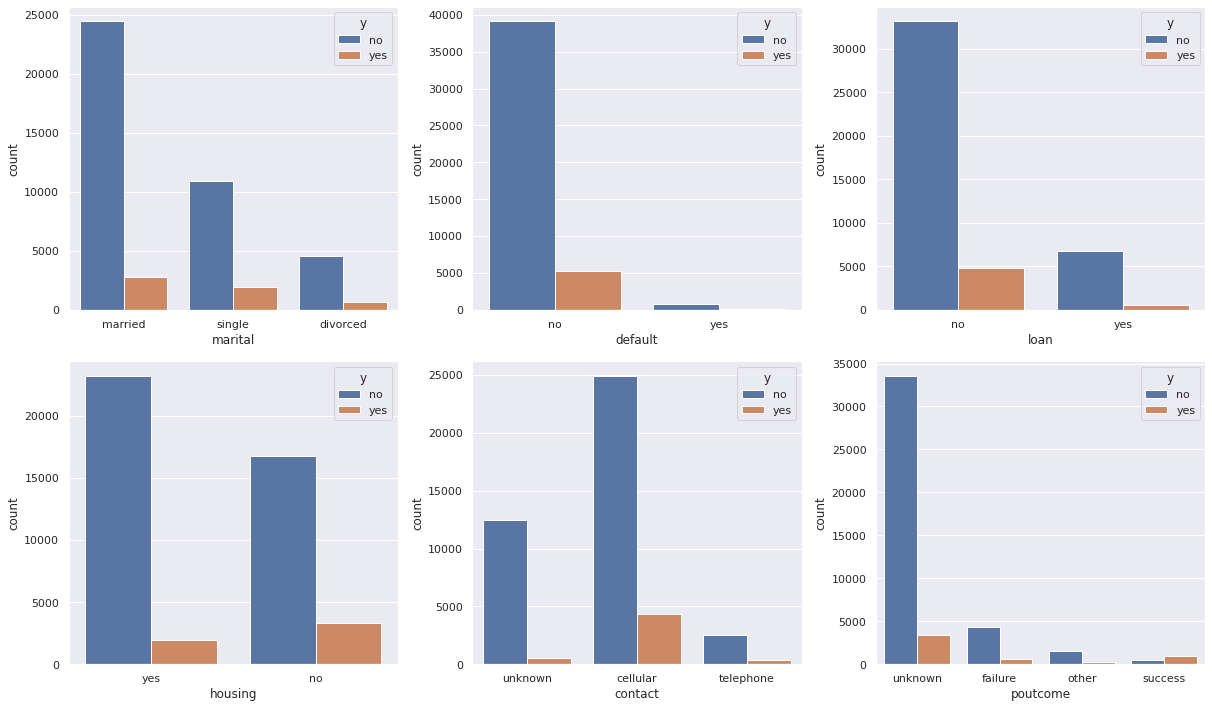

In [ ]:
count_plot(df, ['marital', 'default', 'loan', 'housing', 'contact', 'poutcome'], (2,3), (17,10))

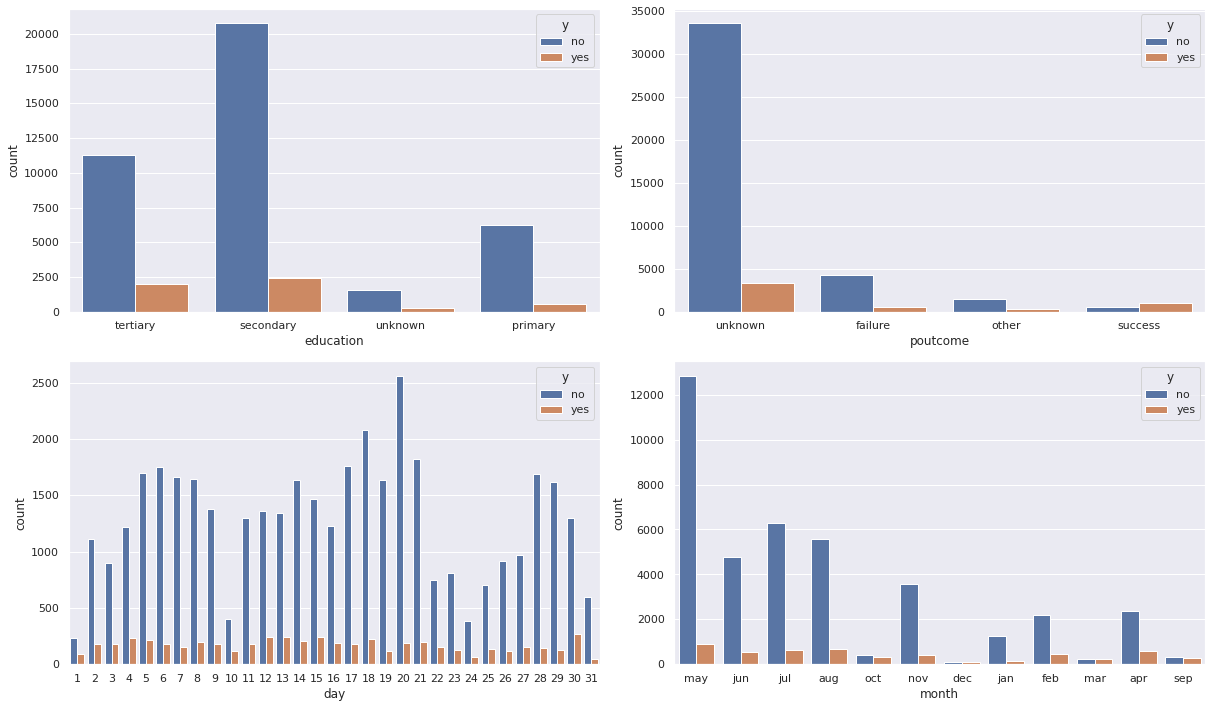

In [ ]:
count_plot(df, ['education', 'poutcome', 'day', 'month'], (2,2), (17,10))

## Classificador Ingênuo de Bayes

### Separação dos Valores de x  e y e Conversão Destes Para Números Inteiros

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
x = df.drop('y',axis =1)
Z = {}
columns = list(x)
for i in columns:
  x[i] = le.fit_transform(x[i])
  Z[i] = np.asarray(x[i])
y = le.fit_transform(df['y'].values)
Z['y'] = np.asarray(y)


(45211, 16)


In [ ]:
x.head()

age  job  marital  education  ...  campaign  pdays  previous  poutcome
0   40    4        1          2  ...         0      0         0         3
1   26    9        2          1  ...         0      0         0         3
2   15    2        1          1  ...         0      0         0         3
3   29    1        1          3  ...         0      0         0         3
4   15   11        2          3  ...         0      0         0         3

[5 rows x 16 columns]

###Distribuição dos dados

In [ ]:
# fit a probability distribution to a univariate data sample
def fit_distribution(data):
    # estimate parameters
    mu = mean(data)
    sigma = std(data)
    #variancia = norm.Mean(data)
    print("Mu: " + str(mu), "Sigma: " + str(sigma))
    # fit distribution
    dist = norm(mu, sigma)
    #print(dist)
    return dist

In [ ]:
def plotgrafico(distribuicao, coluna, x1, y1, maximo):
    x = np.linspace(distribuicao.ppf(0.01), distribuicao.ppf(0.99), 1000)
    r = distribuicao.rvs(size=1000)
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].plot(x, distribuicao.pdf(x), 'r', alpha=0.5, lw=2, label='gaussiana')
    ax[0].set_xlabel('distrib:' + coluna)
    ax[0].set_ylabel('porcentagem da amostra')
    #ax.set_ylim(0,500)
    ax[0].yaxis.set_tick_params(length=0)
    ax[0].xaxis.set_tick_params(length=0)
    ax[0].grid(b=True, which='major', c='w', lw=2, ls='-')
    ax[0].hist(r, density=True, histtype='stepfilled', alpha=0.2)
    ax[0].legend(loc='best', frameon=False)
    legend1 = ax[0].legend()
    legend1.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax[0].spines[spine].set_visible(False)
    ax[1].plot(x1, y1, 'gray', alpha=0.5, lw=2, label=coluna)
    ax[1].set_xlabel('categoria: ' + coluna)
    ax[1].set_ylabel('Quantidade')
    #ax[1].set_xlim(0,80)
    ax[1].set_ylim(0,maximo + 100)
    ax[1].yaxis.set_tick_params(length=0)
    ax[1].xaxis.set_tick_params(length=0)
    ax[1].hist(r, density=True, histtype='stepfilled', alpha=0.2)
    legend2 = ax[1].legend()
    legend2.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax[1].spines[spine].set_visible(False)
    fig.tight_layout()

In [ ]:
def count_plot(coluna):
    dist = Z[coluna]
    distribuicao = fit_distribution(dist) 
    maxage = max(dist) + 1
    #print(maxage)
    x1 = list(range(0,int(maxage)))
    y1 = list(range(0,int(maxage)))
    for i in y1:
        y1[i] = 0
    for i in dist:
        y1[i] += 1
    maximo  = max(y1)
    plotgrafico(distribuicao,coluna,x1,y1, maximo)

Mu: 22.936055384751498 Sigma: 10.61788648022191


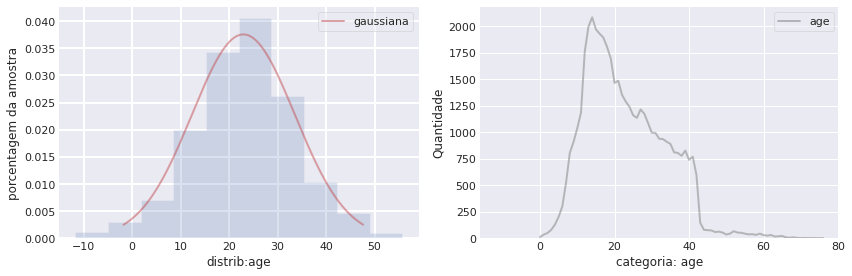

In [ ]:
count_plot('age')

Mu: 4.339762447192055 Sigma: 3.272620727770229


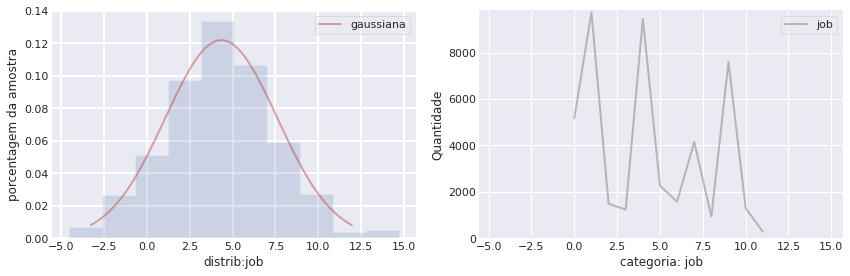

In [ ]:
count_plot('job')

Mu: 1.167724668775298 Sigma: 0.6082230492380273


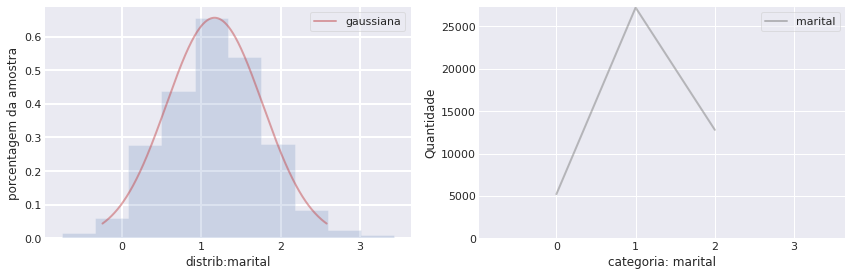

In [ ]:
count_plot('marital')

Mu: 1.224812545619429 Sigma: 0.7479892059457001


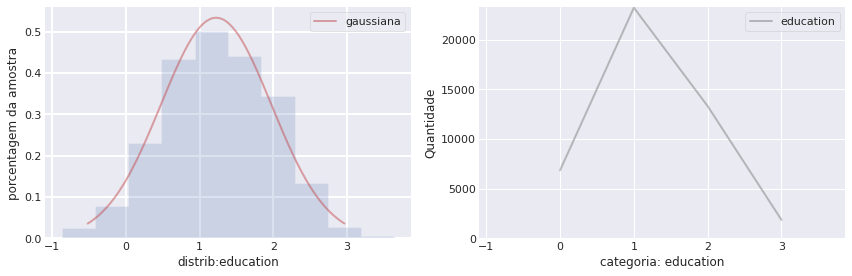

In [ ]:
count_plot('education')

Mu: 1963.3074694211587 Sigma: 1463.5170602784947


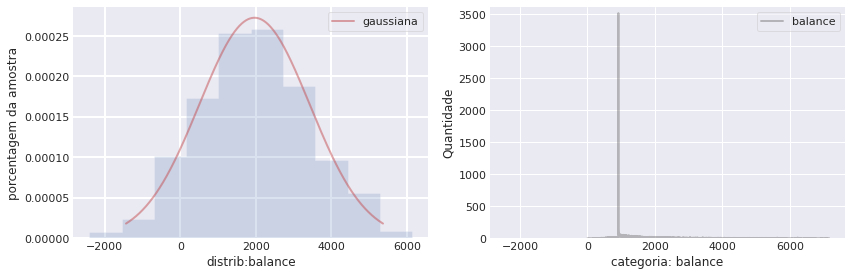

In [ ]:
count_plot('balance')

Mu: 0.5558381809736569 Sigma: 0.4968723151329254


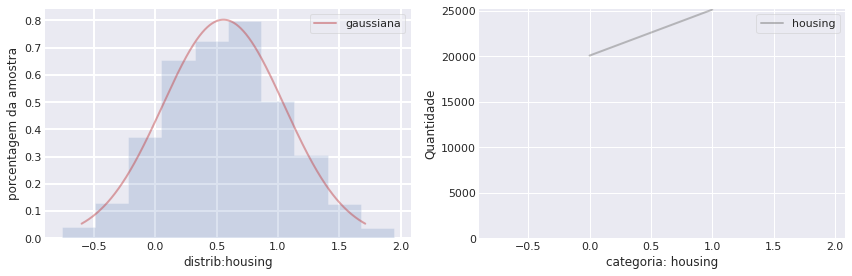

In [ ]:
count_plot('housing')

Mu: 0.16022649355245405 Sigma: 0.3668159815443426


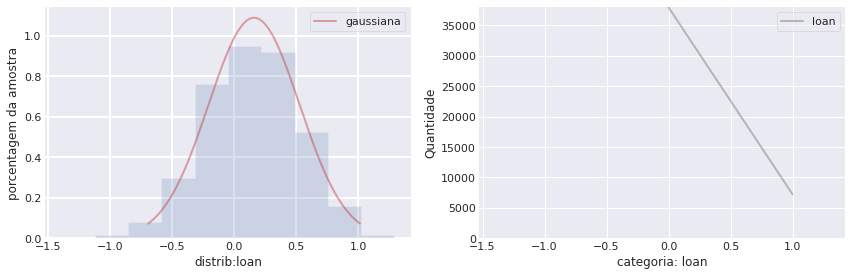

In [ ]:
count_plot('loan')

Mu: 0.6402424188803609 Sigma: 0.8979410280824223


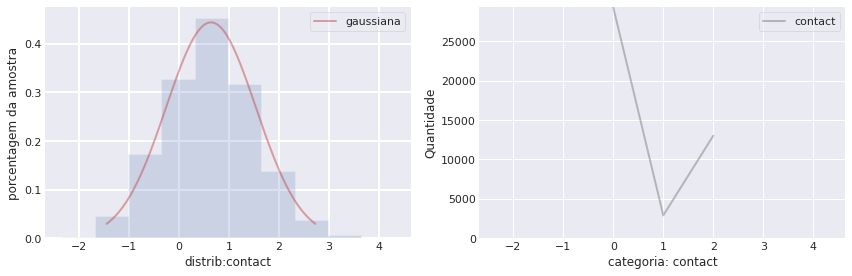

In [ ]:
count_plot('contact')

Mu: 14.80641879188693 Sigma: 8.322384112145542


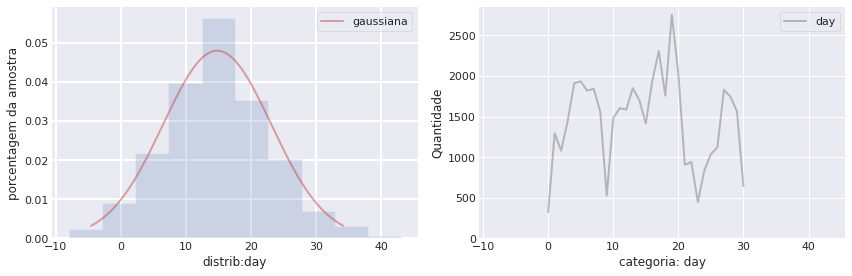

In [ ]:
count_plot('day')

Mu: 5.523014310676605 Sigma: 3.006877622161231


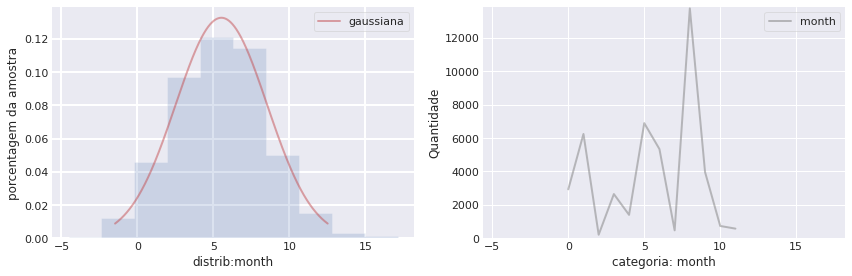

In [ ]:
count_plot('month')

Mu: 255.3385016920661 Sigma: 239.65820171652587


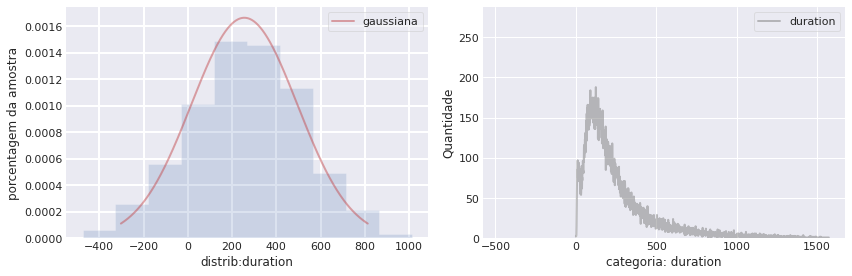

In [ ]:
count_plot('duration')

Mu: 1.7623808365220854 Sigma: 3.0758702149241013


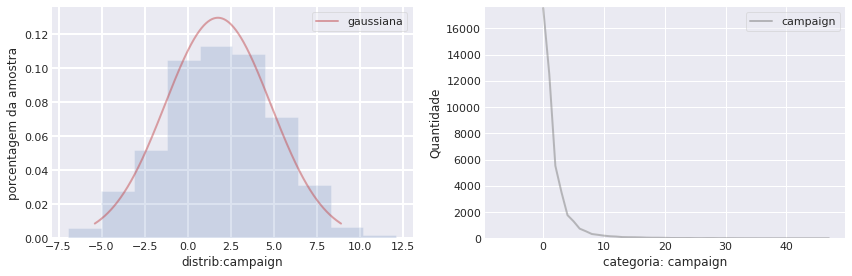

In [ ]:
count_plot('campaign')

Mu: 40.15418814005441 Sigma: 96.91647477242195


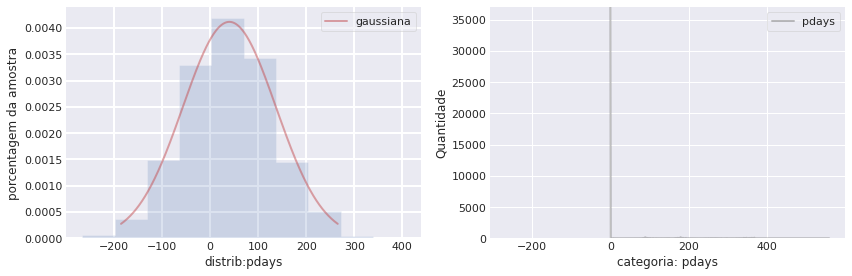

In [ ]:
count_plot('pdays')

Mu: 0.5733560416712747 Sigma: 1.8776791020290375


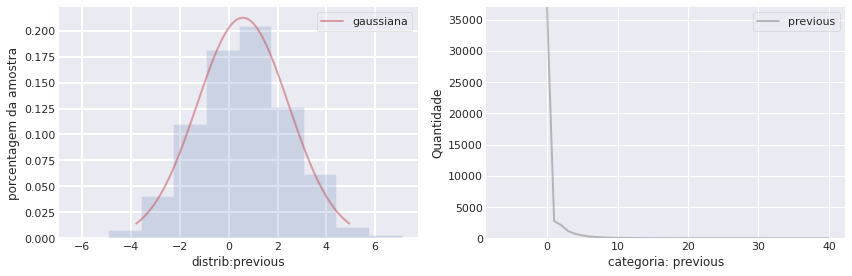

In [ ]:
count_plot('previous')

Mu: 2.559974342527261 Sigma: 0.9890480941711602


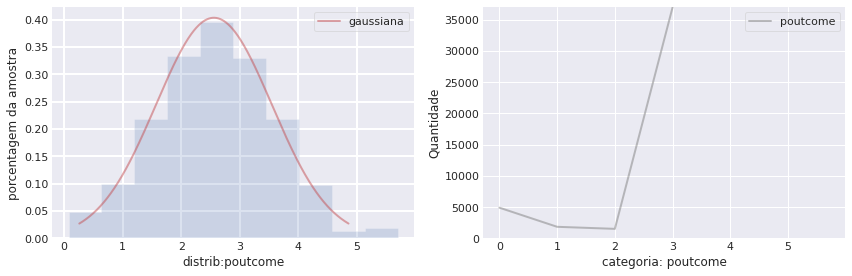

In [ ]:
count_plot('poutcome')

### Separando os Dados para Treino e Para Teste

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=5)

### Treino e Predição Através do Naive Bayes Gaussiano

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_gnb))

Accuracy 0.8433042132035828


In [ ]:
print("Recall score: ", recall_score(y_test,y_pred_gnb,average = 'micro'))
print("Precision score: ", precision_score(y_test,y_pred_gnb,average = 'micro'))
print("F1 score: ", f1_score(y_test,y_pred_gnb,average = 'micro'))

Recall score:  0.8433042132035828
Precision score:  0.8433042132035828
F1 score:  0.8433042132035828


#### Relatorio de Classificação

In [ ]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7997
           1       0.37      0.51      0.43      1046

    accuracy                           0.84      9043
   macro avg       0.65      0.70      0.67      9043
weighted avg       0.87      0.84      0.85      9043



#### Confusion Matrix

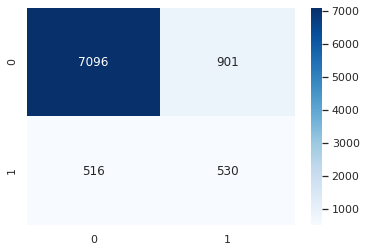

In [ ]:
df_cm_gnb = pd.DataFrame(confusion_matrix(y_test,y_pred_gnb),range(2),range(2))
sns.heatmap(df_cm_gnb,annot = True,cmap='Blues', fmt='g')

### Treino e Predição Através do Naive Bayes Categórico

In [ ]:
cnb = CategoricalNB()
cnb.fit(x_train,y_train)
y_pred_cnb = cnb.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred_cnb))

Accuracy 0.8906336392790003


In [ ]:
print("Recall score: ", recall_score(y_test,y_pred_cnb,average = 'micro'))
print("Precision score: ", precision_score(y_test,y_pred_cnb,average = 'micro'))
print("F1 score: ", f1_score(y_test,y_pred_cnb,average = 'micro'))

Recall score:  0.8906336392790003
Precision score:  0.8906336392790003
F1 score:  0.8906336392790003


#### Relatório de Classificação

In [ ]:
print(classification_report(y_test,y_pred_cnb))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7997
           1       0.53      0.43      0.47      1046

    accuracy                           0.89      9043
   macro avg       0.73      0.69      0.71      9043
weighted avg       0.88      0.89      0.89      9043



#### Confusion Matrix

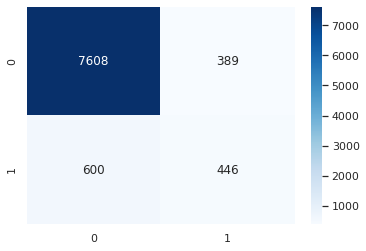

In [ ]:
df_cm_cnb = pd.DataFrame(confusion_matrix(y_test,y_pred_cnb),range(2),range(2))
sns.heatmap(df_cm_cnb,annot = True,cmap='Blues', fmt='g')

####Curiosidades

A dsitribuição das idades se aproxima de uma distribuição gaussiana(normal)


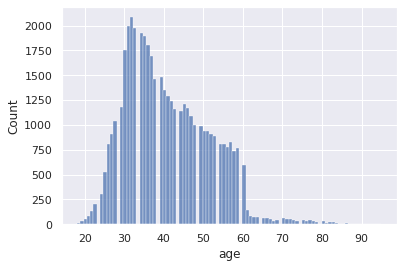

In [ ]:
print("A dsitribuição das idades se aproxima de uma distribuição gaussiana(normal)")
sns.histplot(data=df, x='age');  

## Experimentos

### Apenas a Variável Age Para Treino

#### Separação das Variáveis Para Treino e Teste

In [ ]:
x = df[['age']]
y = y


In [ ]:
print(x)

       age
0       58
1       44
2       33
3       47
4       33
...    ...
45206   51
45207   71
45208   72
45209   57
45210   37

[45211 rows x 1 columns]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=5)

#### Naive Bayes Gaussiano

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_gnb))

Accuracy 0.8818195222648186


In [ ]:
print("Recall score: ", recall_score(y_test,y_pred_gnb,average = 'micro'))
print("Precision score: ", precision_score(y_test,y_pred_gnb,average = 'micro'))
print("F1 score: ", f1_score(y_test,y_pred_gnb,average = 'micro'))

Recall score:  0.8818195222648186
Precision score:  0.8818195222648186
F1 score:  0.8818195222648187


##### Relatório de Classificação

In [ ]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11965
           1       0.48      0.03      0.05      1599

    accuracy                           0.88     13564
   macro avg       0.68      0.51      0.50     13564
weighted avg       0.84      0.88      0.83     13564



##### Confusion Matrix

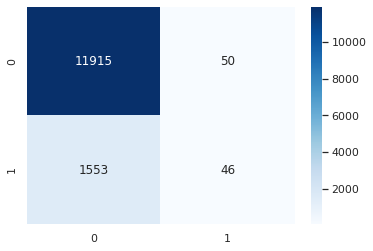

In [ ]:
df_cm_gnb = pd.DataFrame(confusion_matrix(y_test,y_pred_gnb),range(2),range(2))
sns.heatmap(df_cm_gnb,annot = True,cmap='Blues', fmt='g')

#### Naive Bayes Categórico

In [ ]:
cnb = CategoricalNB()
cnb.fit(x_train,y_train)
y_pred_cnb = cnb.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred_cnb))

Accuracy 0.882114420524919


In [ ]:
print("Recall score: ", recall_score(y_test,y_pred_cnb,average = 'micro'))
print("Precision score: ", precision_score(y_test,y_pred_cnb,average = 'micro'))
print("F1 score: ", f1_score(y_test,y_pred_cnb,average = 'micro'))

Recall score:  0.882114420524919
Precision score:  0.882114420524919
F1 score:  0.882114420524919


##### Relatório de Classificação

In [ ]:
print(classification_report(y_test,y_pred_cnb))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11965
           1       0.50      0.02      0.04      1599

    accuracy                           0.88     13564
   macro avg       0.69      0.51      0.49     13564
weighted avg       0.84      0.88      0.83     13564



##### Confusion Matrix

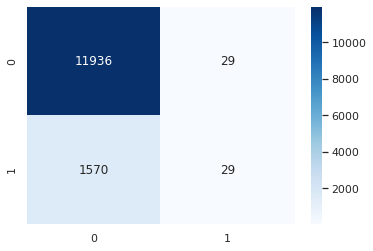

In [ ]:
df_cm_cnb = pd.DataFrame(confusion_matrix(y_test,y_pred_cnb),range(2),range(2))
sns.heatmap(df_cm_cnb,annot = True,cmap='Blues', fmt='g')

### Apenas Variáveis Numéricas Para Treino

#### Separação dos Dados Para Teste e Para Treino

In [ ]:
labels = ['age', 	'day', 	'duration', 	'campaign', 	'previous']
x = pd.DataFrame()
for i in labels:
  x[i] = df[i];
y = le.fit_transform(df['y'].values)

print(x.shape)


(45211, 5)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=5)

#### Classificador Gaussiano

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_gnb))

Accuracy 0.8863167207313477


In [ ]:
print("Recall score: ", recall_score(y_test,y_pred_gnb,average = 'micro'))
print("Precision score: ", precision_score(y_test,y_pred_gnb,average = 'micro'))
print("F1 score: ", f1_score(y_test,y_pred_gnb,average = 'micro'))

Recall score:  0.8863167207313477
Precision score:  0.8863167207313477
F1 score:  0.8863167207313478


##### Relatório de Classificação

In [ ]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     11965
           1       0.53      0.32      0.40      1599

    accuracy                           0.89     13564
   macro avg       0.72      0.64      0.67     13564
weighted avg       0.87      0.89      0.87     13564



##### Confusion Matrix

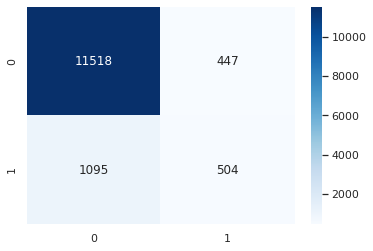

In [ ]:
df_cm_gnb = pd.DataFrame(confusion_matrix(y_test,y_pred_gnb),range(2),range(2))
sns.heatmap(df_cm_gnb,annot = True,cmap='Blues', fmt='g')

#### Classificador Categórico

In [ ]:
cnb = CategoricalNB()
cnb.fit(x_train,y_train)
y_pred_cnb = cnb.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred_cnb))

Accuracy 0.8872751400766735


In [ ]:
print("Recall score: ", recall_score(y_test,y_pred_cnb,average = 'micro'))
print("Precision score: ", precision_score(y_test,y_pred_cnb,average = 'micro'))
print("F1 score: ", f1_score(y_test,y_pred_cnb,average = 'micro'))

Recall score:  0.8872751400766735
Precision score:  0.8872751400766735
F1 score:  0.8872751400766735


###### Relatório de Classificação

In [ ]:
print(classification_report(y_test,y_pred_cnb))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11965
           1       0.63      0.11      0.18      1599

    accuracy                           0.89     13564
   macro avg       0.76      0.55      0.56     13564
weighted avg       0.86      0.89      0.85     13564



##### Confusion Matrix

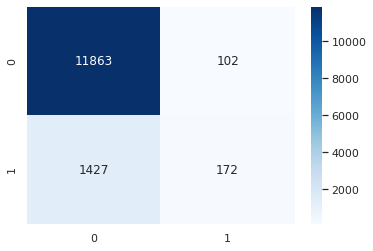

In [ ]:
df_cm_cnb = pd.DataFrame(confusion_matrix(y_test,y_pred_cnb),range(2),range(2))
sns.heatmap(df_cm_cnb,annot = True,cmap='Blues', fmt='g')